In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Charger les données
df = pd.read_csv('Mall_Customers.csv')
print("Dimensions du dataset :", df.shape)
print("\nPremières lignes :")
print(df.head())
print("\nInformations sur les données :")
print(df.info())

Dimensions du dataset : (200, 5)

Premières lignes :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), obj

In [14]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Si valeurs manquantes, les traiter
# df = df.dropna()  # Supprimer les lignes avec valeurs manquantes
# ou
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())  # Remplacer par la moyenne


Valeurs manquantes par colonne :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



Statistiques descriptives :
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


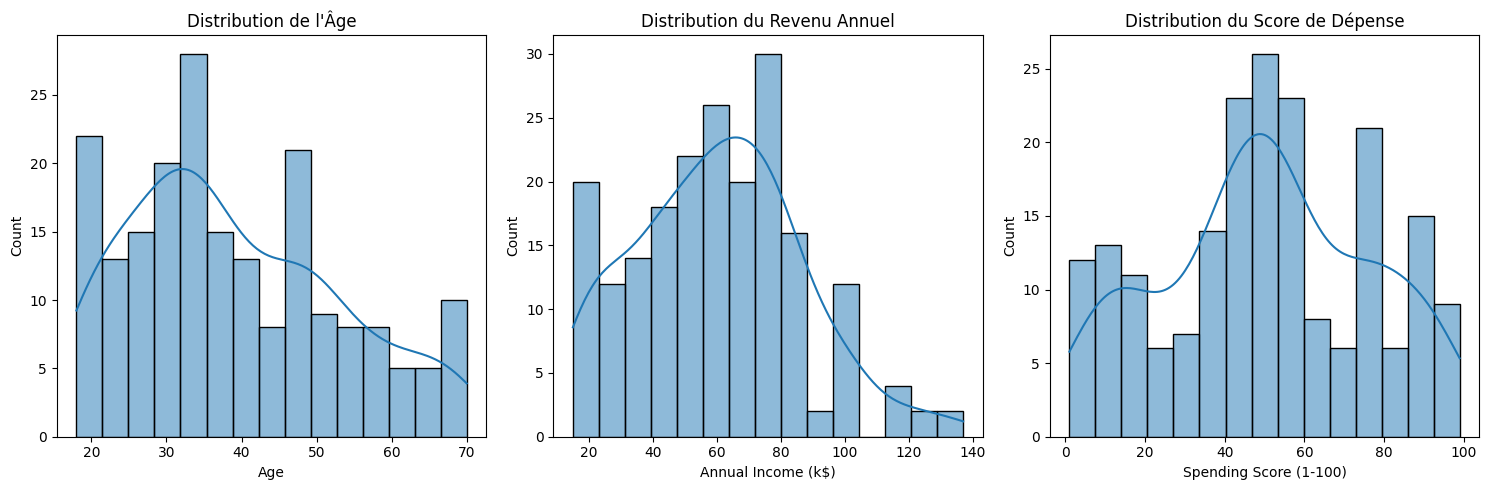


Répartition par genre :
Gender
Female    112
Male       88
Name: count, dtype: int64


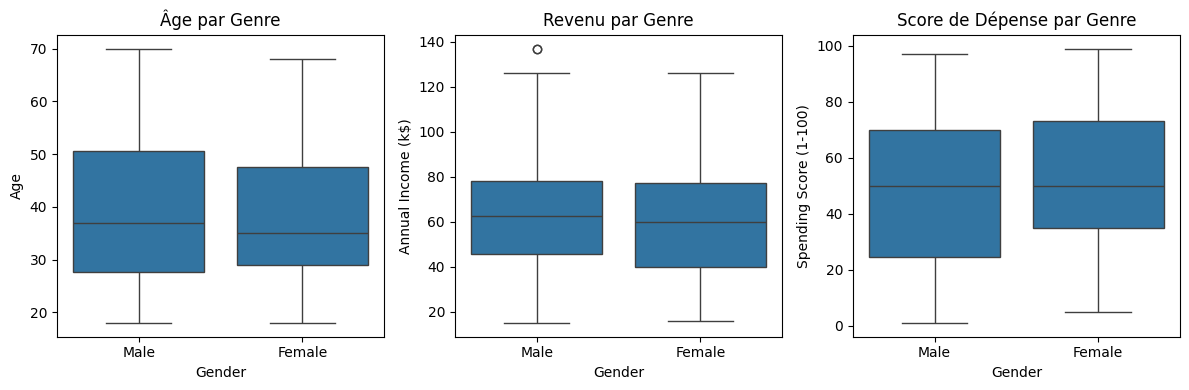

In [30]:

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

# Histogrammes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribution de l\'Âge')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15)
plt.title('Distribution du Revenu Annuel')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15)
plt.title('Distribution du Score de Dépense')

plt.tight_layout()
plt.show()

# Analyse par genre
print("\nRépartition par genre :")
print(df['Gender'].value_counts())

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Âge par Genre')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Revenu par Genre')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Score de Dépense par Genre')

plt.tight_layout()
plt.show()


In [31]:
# Justification du choix des variables

print("""
Justification du choix des variables :
- Age : Influence les habitudes d'achat
- Annual Income (k$) : Capacité financière du client
- Spending Score (1-100) : Comportement de dépense
- CustomerID et Gender ne sont pas utilisés pour le clustering
""")

variables_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[variables_clustering]

print("Variables sélectionnées pour le clustering :")
print(variables_clustering)


Justification du choix des variables :
- Age : Influence les habitudes d'achat
- Annual Income (k$) : Capacité financière du client  
- Spending Score (1-100) : Comportement de dépense
- CustomerID et Gender ne sont pas utilisés pour le clustering

Variables sélectionnées pour le clustering :
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [32]:
# Standardisation des données (important pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création d'un DataFrame avec les données standardisées
X_scaled_df = pd.DataFrame(X_scaled, columns=variables_clustering)
print("\nDonnées standardisées (premières 5 lignes) :")
print(X_scaled_df.head())

print("\nStatistiques après standardisation :")
print(X_scaled_df.describe())


Données standardisées (premières 5 lignes) :
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

Statistiques après standardisation :
                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.894492e+00


Partie 2 - Analyse exploratoire


Création du pairplot...


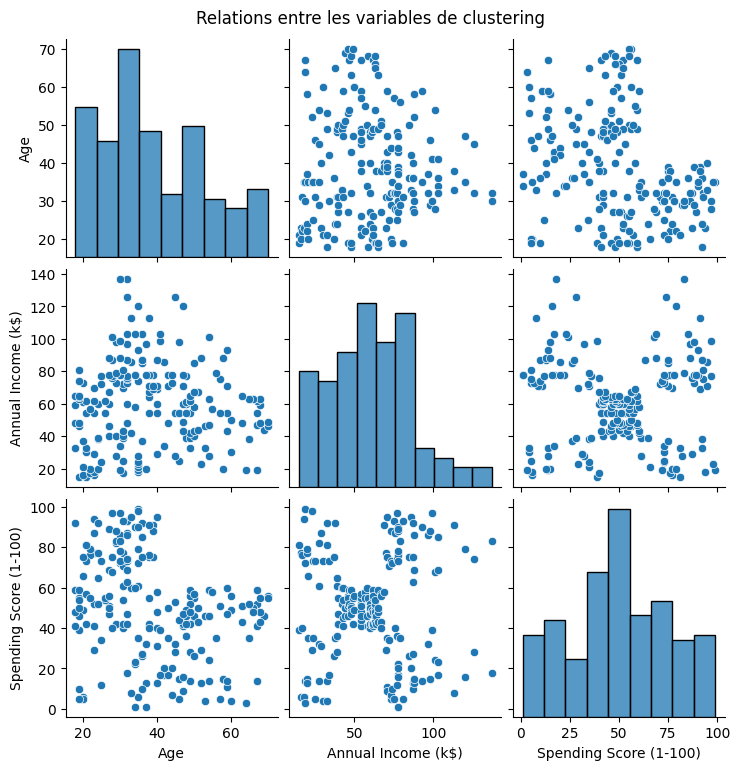

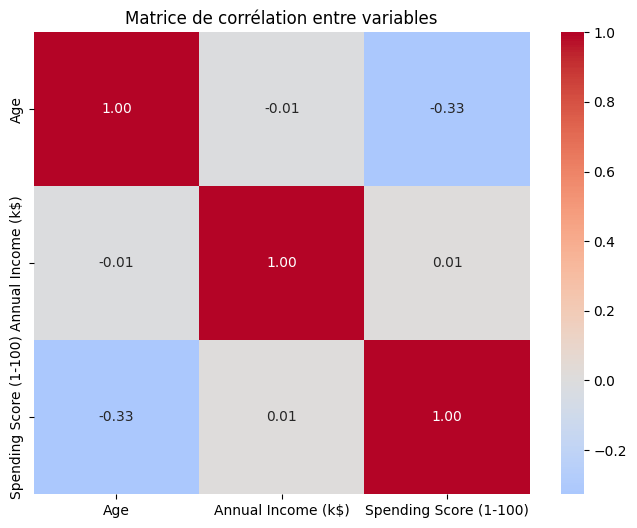

Matrice de corrélation :
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [33]:
# Pairplot pour voir toutes les relations
print("Création du pairplot...")
sns.pairplot(df[variables_clustering])
plt.suptitle('Relations entre les variables de clustering', y=1.02)
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(8, 6))
correlation_matrix = df[variables_clustering].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation entre variables')
plt.show()

print("Matrice de corrélation :")
print(correlation_matrix)

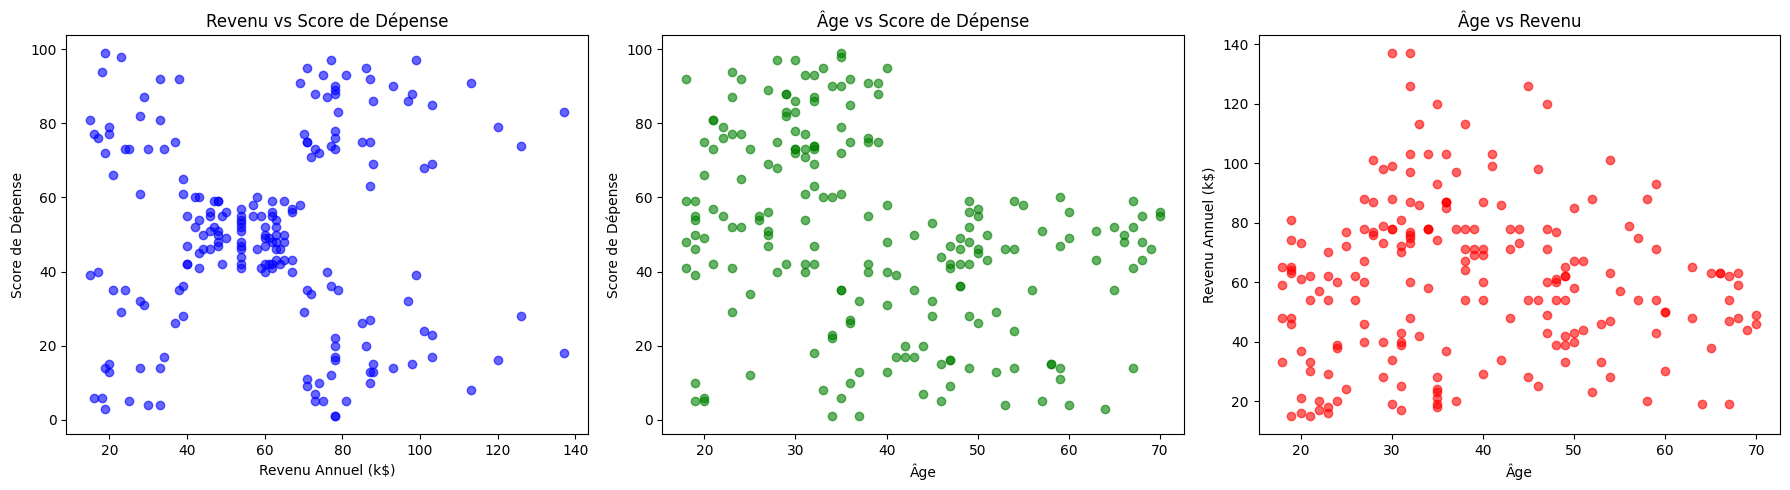

In [34]:
# Scatter plots pour identifier des regroupements visuels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Revenu vs Score de dépense
axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, c='blue')
axes[0].set_xlabel('Revenu Annuel (k$)')
axes[0].set_ylabel('Score de Dépense')
axes[0].set_title('Revenu vs Score de Dépense')

# Âge vs Score de dépense
axes[1].scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.6, c='green')
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Score de Dépense')
axes[1].set_title('Âge vs Score de Dépense')

# Âge vs Revenu
axes[2].scatter(df['Age'], df['Annual Income (k$)'], alpha=0.6, c='red')
axes[2].set_xlabel('Âge')
axes[2].set_ylabel('Revenu Annuel (k$)')
axes[2].set_title('Âge vs Revenu')

plt.tight_layout()
plt.show()

In [35]:
# Analyse visuelle pour émettre des hypothèses
print("""
Hypothèses sur le nombre de segments basées sur l'analyse exploratoire :

1. Revenu vs Score de Dépense : On distingue environ 5 groupes naturels
   - Clients à revenu faible et dépenses faibles
   - Clients à revenu faible et dépenses élevées
   - Clients à revenu moyen et dépenses moyennes
   - Clients à revenu élevé et dépenses faibles
   - Clients à revenu élevé et dépenses élevées

2. Âge vs Score de Dépense : On voit des regroupements par tranche d'âge

Hypothèse initiale : 3 à 6 clusters semblent appropriés
""")


Hypothèses sur le nombre de segments basées sur l'analyse exploratoire :

1. Revenu vs Score de Dépense : On distingue environ 5 groupes naturels
   - Clients à revenu faible et dépenses faibles
   - Clients à revenu faible et dépenses élevées  
   - Clients à revenu moyen et dépenses moyennes
   - Clients à revenu élevé et dépenses faibles
   - Clients à revenu élevé et dépenses élevées

2. Âge vs Score de Dépense : On voit des regroupements par tranche d'âge

Hypothèse initiale : 3 à 6 clusters semblent appropriés



Partie 3 - Application de K-Means


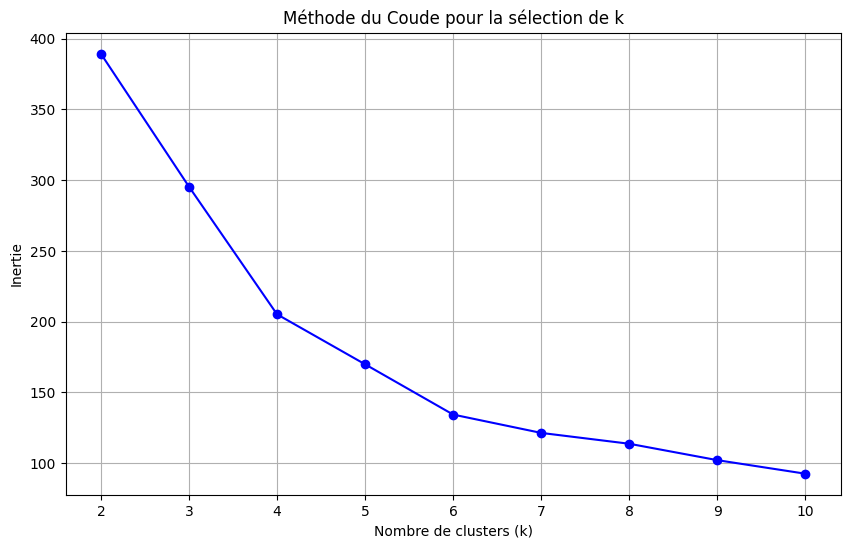

In [36]:
# Méthode du coude
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la sélection de k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Pour k=2, score de silhouette: 0.3355
Pour k=3, score de silhouette: 0.3579
Pour k=4, score de silhouette: 0.4040
Pour k=5, score de silhouette: 0.4085
Pour k=6, score de silhouette: 0.4311
Pour k=7, score de silhouette: 0.4101
Pour k=8, score de silhouette: 0.3674
Pour k=9, score de silhouette: 0.3744
Pour k=10, score de silhouette: 0.3619


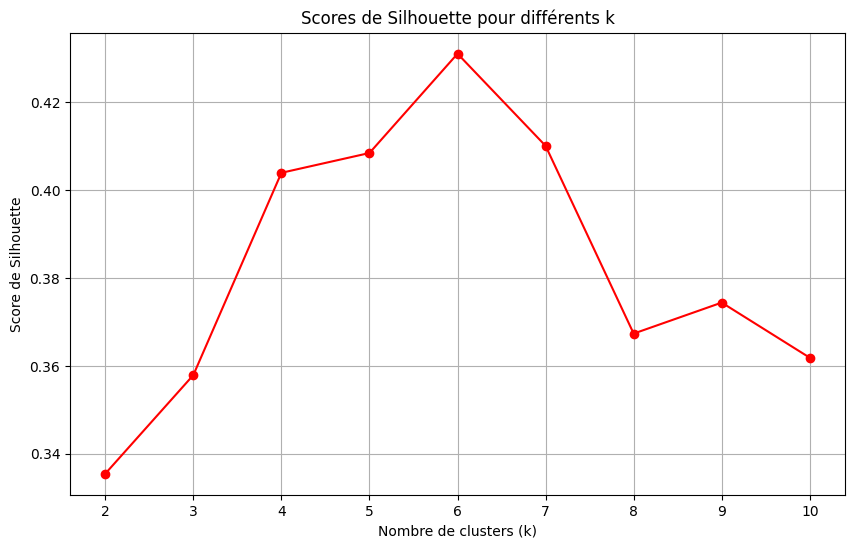

In [37]:
# Calcul des scores de silhouette
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Pour k={k}, score de silhouette: {silhouette_avg:.4f}")

# Graphique des scores de silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.title('Scores de Silhouette pour différents k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [38]:
# Choix du k optimal (exemple avec k=5)

k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"Modèle final entraîné avec k={k_optimal}")
print("Répartition des clusters :")
print(df['Cluster'].value_counts().sort_index())

Modèle final entraîné avec k=5
Répartition des clusters :
Cluster
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64


Partie 4 - Interprétation


In [39]:
# Statistiques par cluster

cluster_profile = df.groupby('Cluster')[variables_clustering].mean()
cluster_profile['Count'] = df.groupby('Cluster').size()

print("Profil moyen par cluster :")
print(cluster_profile)

Profil moyen par cluster :
               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        55.275862           47.620690               41.706897     58
1        32.875000           86.100000               81.525000     40
2        25.769231           26.115385               74.846154     26
3        26.733333           54.311111               40.911111     45
4        44.387097           89.774194               18.483871     31


In [40]:
# Analyse détaillée de chaque cluster

for cluster in range(k_optimal):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\n--- Cluster {cluster} ---")
    print(f"Nombre de clients: {len(cluster_data)}")
    print(f"Âge moyen: {cluster_data['Age'].mean():.1f} ans")
    print(f"Revenu moyen: {cluster_data['Annual Income (k$)'].mean():.1f} k$")
    print(f"Score de dépense moyen: {cluster_data['Spending Score (1-100)'].mean():.1f}")


--- Cluster 0 ---
Nombre de clients: 58
Âge moyen: 55.3 ans
Revenu moyen: 47.6 k$
Score de dépense moyen: 41.7

--- Cluster 1 ---
Nombre de clients: 40
Âge moyen: 32.9 ans
Revenu moyen: 86.1 k$
Score de dépense moyen: 81.5

--- Cluster 2 ---
Nombre de clients: 26
Âge moyen: 25.8 ans
Revenu moyen: 26.1 k$
Score de dépense moyen: 74.8

--- Cluster 3 ---
Nombre de clients: 45
Âge moyen: 26.7 ans
Revenu moyen: 54.3 k$
Score de dépense moyen: 40.9

--- Cluster 4 ---
Nombre de clients: 31
Âge moyen: 44.4 ans
Revenu moyen: 89.8 k$
Score de dépense moyen: 18.5


In [42]:
# Exemple de noms basés sur les caractéristiques

segment_names = {
    0: "Jeunes à revenu moyen et dépenses modérées",
    1: "Jeunes à haut revenu et fortes dépenses",
    2: "Clients âgés à revenu moyen et faibles dépenses",
    3: "Adultes à revenu moyen et dépenses élevées",
    4: "Jeunes à faible revenu et fortes dépenses"
}

df['Segment'] = df['Cluster'].map(segment_names)

Segment names: {0: 'Jeunes à revenu moyen et dépenses modérées', 1: 'Jeunes à haut revenu et fortes dépenses', 2: 'Clients âgés à revenu moyen et faibles dépenses', 3: 'Adultes à revenu moyen et dépenses élevées', 4: 'Jeunes à faible revenu et fortes dépenses'}


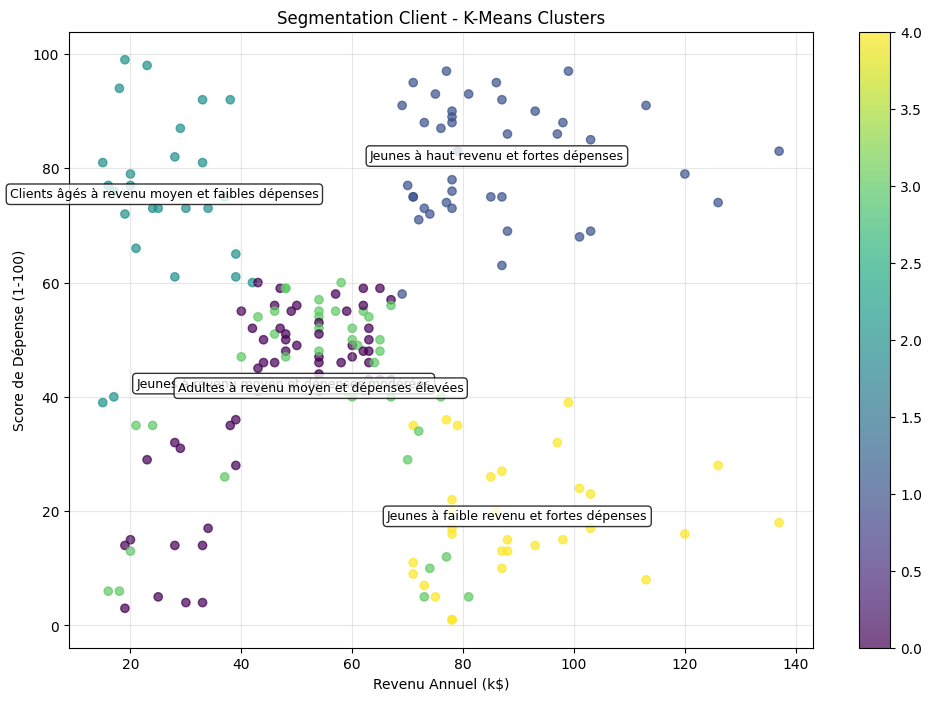

In [43]:
# Visualisation 2D

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Score de Dépense (1-100)')
plt.title('Segmentation Client - K-Means Clusters')

print("Segment names:", segment_names)

for i, segment in segment_names.items():
    cluster_data = df[df['Cluster'] == i]
    if len(cluster_data) > 0:
        x_pos = cluster_data['Annual Income (k$)'].mean()
        y_pos = cluster_data['Spending Score (1-100)'].mean()
        plt.text(x_pos, y_pos, segment, fontsize=9, ha='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("Comparaison DBSCAN vs K-Means:")
print(f"Nombre de clusters DBSCAN: {len(set(dbscan_labels))}")
print(f"Nombre de clusters K-Means: {k_optimal}")

Comparaison DBSCAN vs K-Means:
Nombre de clusters DBSCAN: 7
Nombre de clusters K-Means: 5


In [29]:
print("\n=== RECOMMANDATIONS BUSINESS ===")
for cluster, segment_name in segment_names.items():
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nSegment: {segment_name}")
    print(f"- Taille: {len(cluster_data)} clients")
    print(f"- Caractéristiques: Âge {cluster_data['Age'].mean():.1f} ans, "
          f"Revenu {cluster_data['Annual Income (k$)'].mean():.1f} k$, "
          f"Dépenses {cluster_data['Spending Score (1-100)'].mean():.1f}")


=== RECOMMANDATIONS BUSINESS ===

Segment: Jeunes à revenu moyen et dépenses modérées
- Taille: 58 clients
- Caractéristiques: Âge 55.3 ans, Revenu 47.6 k$, Dépenses 41.7

Segment: Jeunes à haut revenu et fortes dépenses
- Taille: 40 clients
- Caractéristiques: Âge 32.9 ans, Revenu 86.1 k$, Dépenses 81.5

Segment: Clients âgés à revenu moyen et faibles dépenses
- Taille: 26 clients
- Caractéristiques: Âge 25.8 ans, Revenu 26.1 k$, Dépenses 74.8

Segment: Adultes à revenu moyen et dépenses élevées
- Taille: 45 clients
- Caractéristiques: Âge 26.7 ans, Revenu 54.3 k$, Dépenses 40.9

Segment: Jeunes à faible revenu et fortes dépenses
- Taille: 31 clients
- Caractéristiques: Âge 44.4 ans, Revenu 89.8 k$, Dépenses 18.5
